In [1]:
# Accretion of matter as per eq. (10) and (11) of https://arxiv.org/pdf/2003.12589.pdf

from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
from accretion import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})




# Accretion around the PBH as per Luca et. al https://arxiv.org/pdf/2003.12589.pdf
# Here, s = a/a_eq
# Here, v = c_s with c_s speed of sound in the surrounding medium.
# Here, γ is the ratio between the PBH mass and the horizon mass.



# References: 1.) https://arxiv.org/pdf/0709.0524.pdf
#             2.) https://arxiv.org/pdf/2003.02778.pdf
#             3.) https://arxiv.org/pdf/2003.12589.pdf


   
    
def m_acc_Luca(t, m):  #dimensionless accretion as eq. 22 of https://arxiv.org/pdf/0709.0524.pdf. 
    
    z = t
    y = np.array(m, dtype = np.longdouble)
    
    if z < 0 or z == 0:
        print("i =",   i, ",", "z =", z)
        
    
    def v_eff(z):    #in units of kms⁻¹ with the approximation of v<< c_s(z)
        β = 1.72
        z_dec = 130
        return 5.74e3 * np.sqrt((1+z)/1000) * (((((1+z_dec)/(1 + z))**β) + 1)**(-1/(2 * β))) * (yr/pc)
    
    
    def λ(z, m):
        def β_cap(z, m):
            x_e = 1e-3
            return 1e-4 * y * (((1+z)/1000)**(3/2)) *  ((5.74e3 * (yr/pc)/v_eff(z))**3) * [0.257 + 1.45 * (x_e/0.01) * (((1+z)/1000)**(5/2))]
        def x_cr(z, m):
            return (-1 + np.sqrt(1 + β_cap(z, m)))/β_cap(z, m)
        return np.exp((9/2)/ (3 + β_cap(z, m)*(3/4))) * (x_cr(z, m)**2)
    
    
    def m_dot(z, m):  #Eq.(11) in https://arxiv.org/abs/2003.12589
        return   2.3e-2 * λ(z, m) * (((1+z)/1000)**3) *  y * ((5.74e3 * (yr/pc)/v_eff(z))**3) 

    def m_dot_Edd(z, m): # Eq.(10) in https://arxiv.org/abs/2003.12589
        return 1.44e14 * y * (yr/M_solar)
    
    def dt_dz(z):
        x = ((Ω_r0 * ((1 + z)**6)) + (Ω_m0 * ((1 + z)**5)))
        return  - np.sqrt(3/(8 * π * G * ρ_c0)) * (x**(-1/2))
    
    return  m_dot(z, m) *   m_dot_Edd(z, m) *  dt_dz(z)


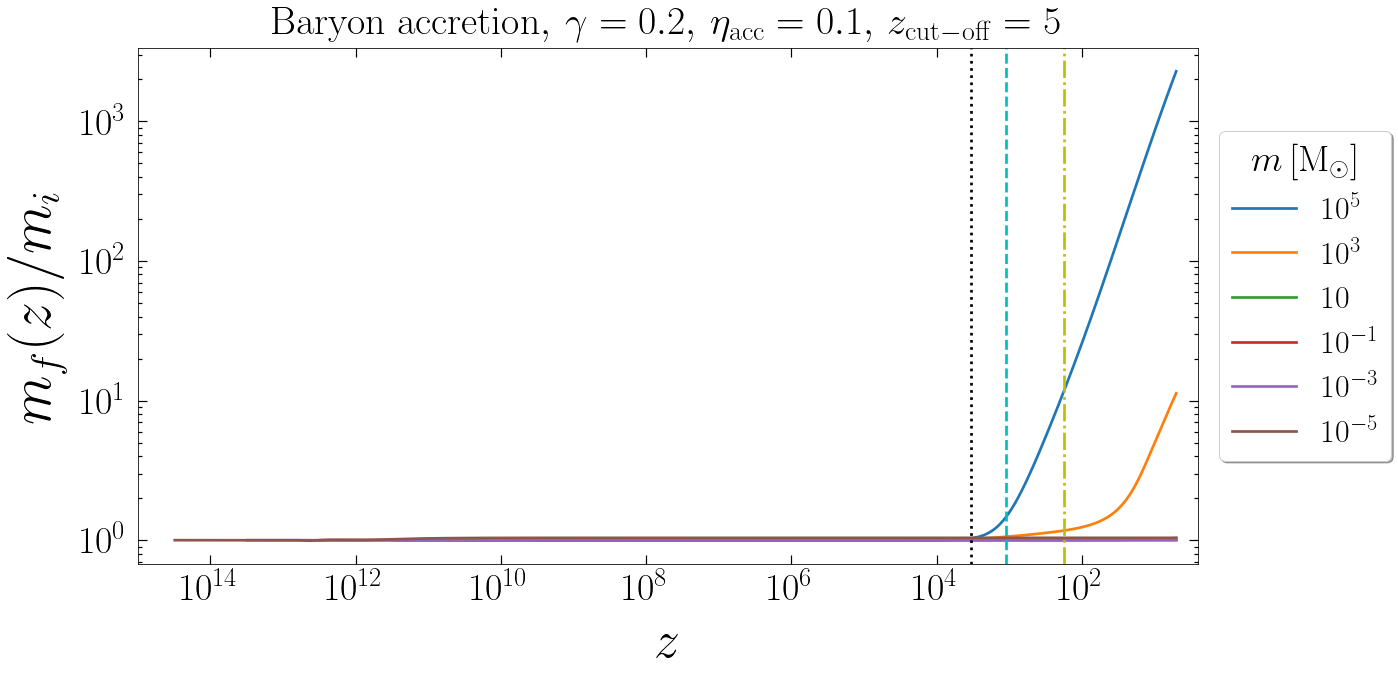

In [3]:
# Baryon accretion as per Fig. 1 of Luca et. al https://arxiv.org/pdf/2003.12589.pdf 
# to upto z_cut-off = 5.


m_arr = np.geomspace(1e5, 1e-5, 6)


colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 2.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


γ = 0.2
z_cut = 5
N = 1000

for i, (m, color) in enumerate(zip(m_arr, colors)):
    z_1i = z_pbh(m,  γ)
    y_1i = m
    z_cut_off1 = z_eq
    t1 = np.geomspace(z_1i, z_cut_off1, N)
    sol1 = solve_ivp(m_acc_Luca, t_span = [t1[0], t1[-1]], y0 = [y_1i], method = 'DOP853', t_eval = t1)
    t1 = sol1.t
    y1 = sol1.y[0]
    
    
    z_2i = z_cut_off1
    y_2i = y1[-1]
    z_cut_off2 = z_rec
    t2 = np.geomspace(z_2i, z_cut_off2, N)
    sol2 = solve_ivp(m_acc_Luca, t_span = [t2[0], t2[-1]], y0 = [y_2i], method = 'DOP853', t_eval = t2, first_step = 10,  max_step = 100)
    t2 = sol2.t
    y2 = sol2.y[0]
    
    
    z_3i = z_cut_off2
    y_3i = y2[-1]
    z_cut_off3 = z_th
    t3 = np.geomspace(z_3i, z_cut_off3, N)
    sol3 = solve_ivp(m_acc_Luca, t_span = [t3[0], t3[-1]], y0 = [y_3i], method = 'DOP853', t_eval = t3, first_step = 1,  max_step = 10)
    t3 = sol3.t
    y3 = sol3.y[0]
    
    
    
    z_4i = z_cut_off3
    y_4i = y3[-1]
    z_cut_off4 = 90
    t4 = np.geomspace(z_4i, z_cut_off4, N)
    sol4 = solve_ivp(m_acc_Luca, t_span = [z_4i, z_cut_off4], y0 = [y_4i],  method = 'DOP853', t_eval = t4, first_step = 1, max_step = 5)
    t4 = sol4.t
    y4 = sol4.y[0]
    
    
    z_5i = z_cut_off4
    y_5i = y4[-1]
    z_cut_off5 = z_cut
    t5 = np.geomspace(z_5i, z_cut_off5, N)
    sol5 = solve_ivp(m_acc_Luca, t_span = [t5[0], t5[-1]], y0 = [y_5i],  method = 'DOP853', t_eval = t5, first_step = 1,  max_step = 3)
    t5 = sol5.t
    y5 = sol5.y[0]
    
    
   
    
    
    T = np.concatenate((t1, t2, t3, t4, t5), axis=None)
    Y = np.concatenate((y1, y2, y3, y4, y5), axis=None)
    
    ax.loglog(T, (Y/m))

        
    
    
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.axvline(x = z_rec,  color = 'c',  linestyle = '--')
plt.axvline(x = z_th,  color = 'y',  linestyle = '-.')
ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)


plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$z$',fontsize = 52, labelpad = 14)
plt.ylabel(r'$m_{f}(z)/m_{i} $',fontsize = 58, labelpad = 14)
plt.legend(['$10^{5}$', r'$10^{3}$', '$10$', 
            '$10^{-1}$', '$10^{-3}$', r'$10^{-5}$'], 
           prop = {'size':32}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)
plt.xlim(1e15, 0.5*z_cut)
plt.xscale('log')
plt.title(r'Baryon accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1, \, z_\mathrm{cut-off} = 5$', fontsize = 40, pad = 13)
plt.savefig('Luca_z_cutoff5.pdf', bbox_inches = 'tight')
plt.show()

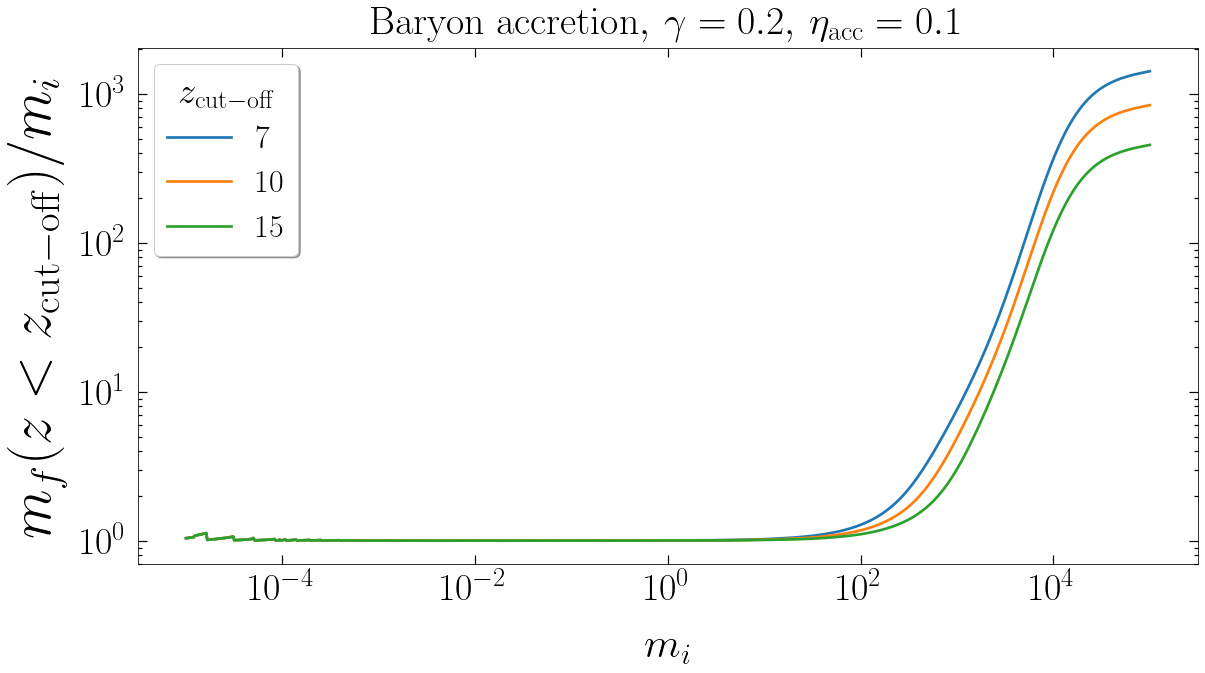

In [2]:
# Baryon accretion as per Fig. 1 of Luca et. al https://arxiv.org/pdf/2003.12589.pdf 
# for different values of z_cut-off.
# Here, m_f(z < z_cut-off)/m_i implies  m_f(z = z_cut-off)/m_i.

m_spacing = 1000
mi_arr = np.geomspace(1e-5, 1e5, m_spacing)




colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 2.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_cut_arr = np.array([7, 10, 15])
mf_arr = np.zeros(len(mi_arr))
colors = ['C0', 'C1', 'C2']
plot_lines = []
N = 10

for i, (z_cut, color) in enumerate(zip(z_cut_arr, colors)):
    for j, m in enumerate(mi_arr):
        γ = 0.2
        z_1i = z_pbh(m,  γ)
        y_1i = m
        z_cut_off1 = z_eq
        t1 = np.geomspace(z_1i, z_cut_off1, N)
        sol1 = solve_ivp(m_acc_Luca, t_span = [t1[0], t1[-1]], y0 = [y_1i], method = 'DOP853',  t_eval = t1)
        t1 = sol1.t
        y1 = sol1.y[0]


        z_2i = z_eq
        y_2i = y1[-1]
        z_cut_off2 = z_rec
        t2 = np.geomspace(z_2i, z_cut_off2, N)
        sol2 = solve_ivp(m_acc_Luca, t_span = [t2[0], t2[-1]], y0 = [y_2i], method = 'DOP853', t_eval = t2, first_step = 10, max_step = 100)
        t2 = sol2.t
        y2 = sol2.y[0]



        z_3i = z_rec
        y_3i = y2[-1]
        z_cut_off3 = z_th
        t3 = np.geomspace(z_3i, z_cut_off3, N)
        sol3 = solve_ivp(m_acc_Luca, t_span = [t3[0], t3[-1]], y0 = [y_3i], method = 'DOP853', t_eval = t3, first_step = 1, max_step = 10)
        t3 = sol3.t
        y3 = sol3.y[0]

        
        z_4i = z_th
        y_4i = y3[-1]
        z_cut_off4 = 90
        t4 = np.geomspace(z_4i, z_cut_off4, N)
        sol4 = solve_ivp(m_acc_Luca, t_span = [t4[0], t4[-1]], y0 = [y_4i], method = 'DOP853', t_eval = t4, first_step = 1, max_step = 5)
        t4 = sol4.t
        y4 = sol4.y[0]


        
        z_5i = z_cut_off4
        y_5i = y4[-1]
        z_cut_off5 = z_cut
        t5 = np.geomspace(z_5i, z_cut_off5, N)
        t_span = [t5[0], t5[-1]]
        sol5 = solve_ivp(m_acc_Luca, t_span = [t5[0], t5[-1]], y0 = [y_5i], method = 'DOP853',  t_eval = t5, first_step = 1, max_step = 3)
        t5 = sol5.t
        y5 = sol5.y[0]
        
        
        mf_arr[j] = y5[-1]
        

        
    ax.loglog(mi_arr, np.divide(mf_arr, mi_arr))
        
        
       
    
ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
ax.yaxis.set_tick_params(labelsize=20)
plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$m_{i}$',fontsize = 43, labelpad = 20)
plt.ylabel(r'$m_{f}(z < z_\mathrm{cut-off})/m_{i} $',fontsize = 58, labelpad = 14)
plt.legend(['$7$', '$10$', '$15$'], 
           prop = {'size':32}, loc = 'upper left', shadow = True, 
           title = '$z_\mathrm{cut-off}$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)
#plt.xlim(1e16, 0.5*z_cut_off)
plt.xscale('log')
plt.title(r'Baryon accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1$', fontsize = 40, pad = 13)
plt.savefig('Luca_z_diff_cutoff.pdf', bbox_inches = 'tight')
plt.show()

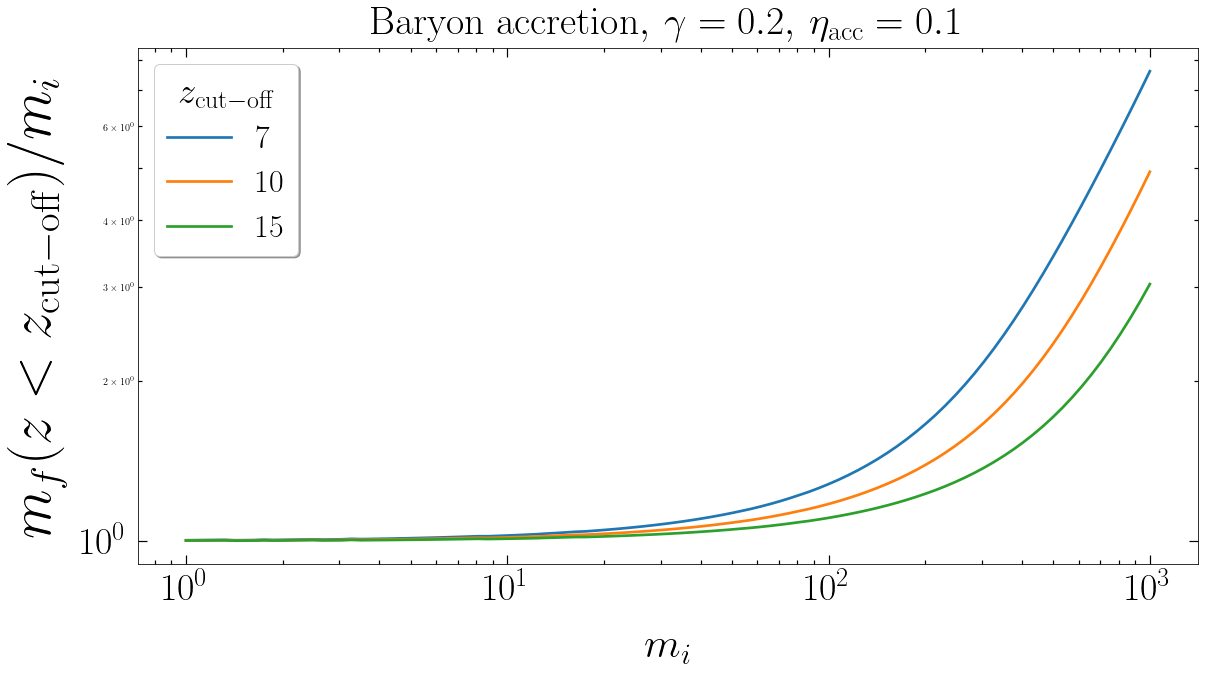

In [3]:
# Baryon accretion as per Fig. 1 of Luca et. al https://arxiv.org/pdf/2003.12589.pdf 
# for different values of z_cut-off.
# Here, m_f(z < z_cut-off)/m_i implies  m_f(z = z_cut-off)/m_i.



m_spacing = 100
mi_arr = np.geomspace(1, 1e3, m_spacing)




colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (19, 9.5))
plt.rc('lines', linewidth = 2.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_cut_arr = np.array([7, 10, 15])
mf_arr = np.zeros(len(mi_arr))
colors = ['C0', 'C1', 'C2']
plot_lines = []
N = 10

for i, (z_cut, color) in enumerate(zip(z_cut_arr, colors)):
    for j, m in enumerate(mi_arr):
        γ = 0.2
        z_1i = z_pbh(m,  γ)
        y_1i = m
        z_cut_off1 = z_eq
        t1 = np.geomspace(z_1i, z_cut_off1, N)
        sol1 = solve_ivp(m_acc_Luca, t_span = [t1[0], t1[-1]], y0 = [y_1i], method = 'DOP853',  t_eval = t1)
        t1 = sol1.t
        y1 = sol1.y[0]


        z_2i = z_eq
        y_2i = y1[-1]
        z_cut_off2 = z_rec
        t2 = np.geomspace(z_2i, z_cut_off2, N)
        sol2 = solve_ivp(m_acc_Luca, t_span = [t2[0], t2[-1]], y0 = [y_2i], method = 'DOP853', t_eval = t2, first_step = 10, max_step = 100)
        t2 = sol2.t
        y2 = sol2.y[0]



        z_3i = z_rec
        y_3i = y2[-1]
        z_cut_off3 = z_th
        t3 = np.geomspace(z_3i, z_cut_off3, N)
        sol3 = solve_ivp(m_acc_Luca, t_span = [t3[0], t3[-1]], y0 = [y_3i], method = 'DOP853', t_eval = t3, first_step = 1, max_step = 10)
        t3 = sol3.t
        y3 = sol3.y[0]

        
        z_4i = z_th
        y_4i = y3[-1]
        z_cut_off4 = 90
        t4 = np.geomspace(z_4i, z_cut_off4, N)
        sol4 = solve_ivp(m_acc_Luca, t_span = [t4[0], t4[-1]], y0 = [y_4i], method = 'DOP853', t_eval = t4, first_step = 1, max_step = 5)
        t4 = sol4.t
        y4 = sol4.y[0]


        
        z_5i = z_cut_off4
        y_5i = y4[-1]
        z_cut_off5 = z_cut
        t5 = np.geomspace(z_5i, z_cut_off5, N)
        t_span = [t5[0], t5[-1]]
        sol5 = solve_ivp(m_acc_Luca, t_span = [t5[0], t5[-1]], y0 = [y_5i], method = 'DOP853',  t_eval = t5, first_step = 1, max_step = 3)
        t5 = sol5.t
        y5 = sol5.y[0]
        
        
        mf_arr[j] = y5[-1]
        

        
    ax.loglog(mi_arr, np.divide(mf_arr, mi_arr))
        
        
       
    
ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
ax.yaxis.set_tick_params(labelsize=20)
plt.xticks(fontsize = 38)
plt.yticks(fontsize = 38)
plt.xlabel('$m_{i}$',fontsize = 43, labelpad = 20)
plt.ylabel(r'$m_{f}(z < z_\mathrm{cut-off})/m_{i} $',fontsize = 58, labelpad = 14)
plt.legend(['$7$', '$10$', '$15$'], 
           prop = {'size':32}, loc = 'upper left', shadow = True, 
           title = '$z_\mathrm{cut-off}$' ,
           title_fontsize = 37, facecolor = 'white', fontsize = 65)
#plt.xlim(1e16, 0.5*z_cut_off)
plt.xscale('log')
plt.title(r'Baryon accretion$,\, \gamma = 0.2, \,\eta_\mathrm{acc} = 0.1$', fontsize = 40, pad = 13)
plt.savefig('Luca_z_diff_cutoff2.pdf', bbox_inches = 'tight')
plt.show()